## AQI using KNN

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
df = pd.read_csv('Data/Real-Data/Real_Combine.csv')
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


<AxesSubplot:>

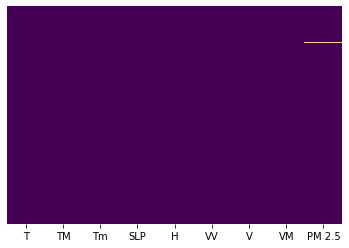

In [6]:
# Checking null values 
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
#remove null values
df = df.dropna()

<AxesSubplot:>

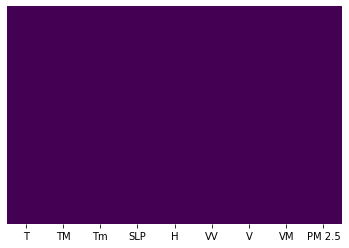

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

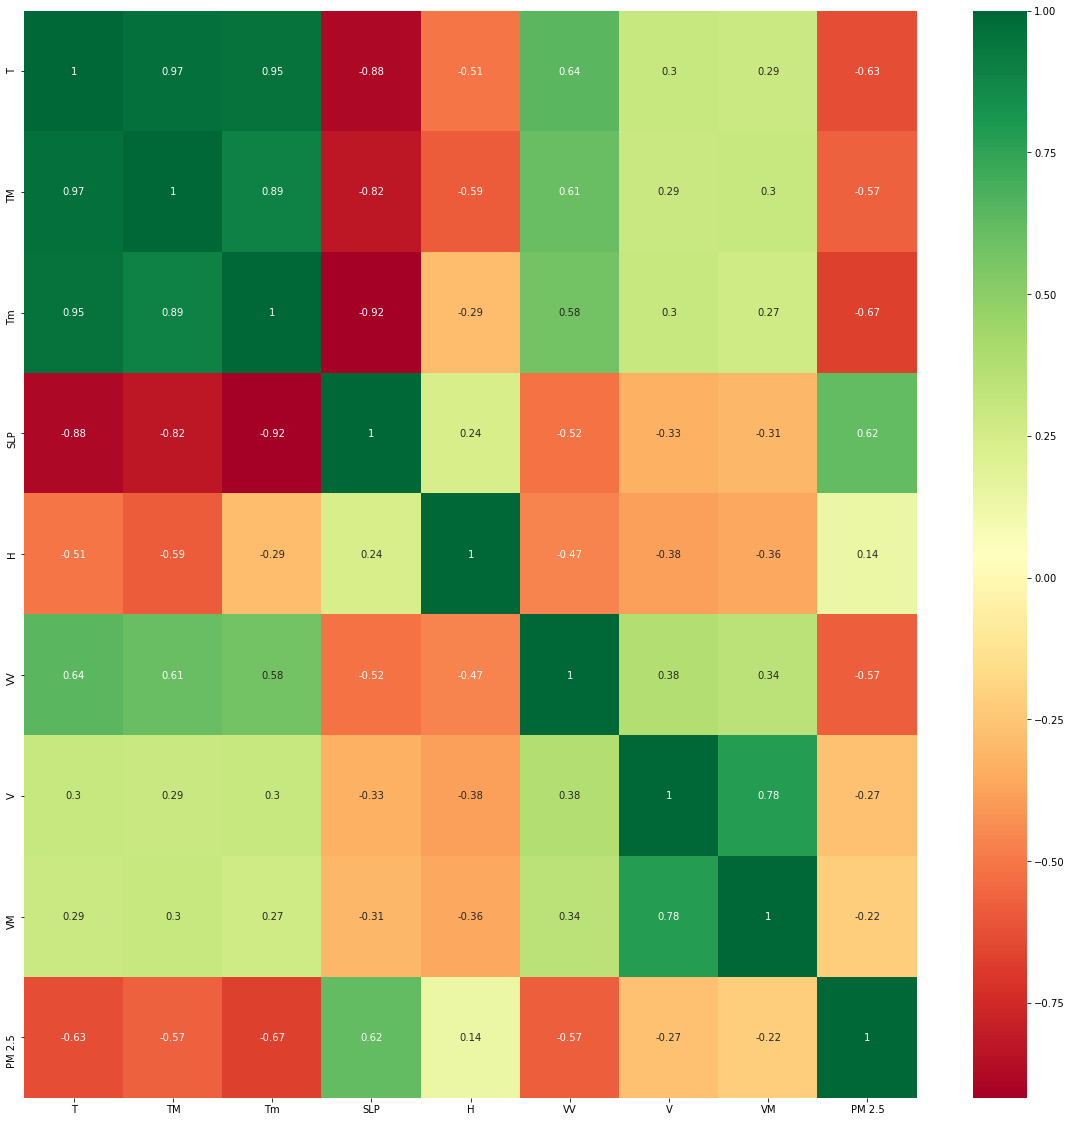

In [9]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [10]:
X = df.iloc[:,:-1]# for independent features
y= df.iloc[:,-1] # for dependent features

In [11]:
X.columns

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM'], dtype='object')

In [12]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [13]:
print(model.feature_importances_)

[0.20634766 0.08186798 0.22576238 0.12974719 0.08911826 0.17219799
 0.05397807 0.04098047]


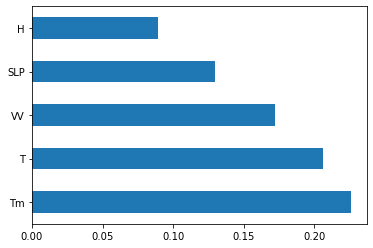

In [14]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

C:\Users\1mura\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

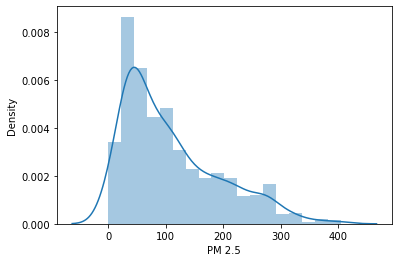

In [15]:
sns.distplot(y)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [18]:
from sklearn.neighbors import KNeighborsRegressor

In [19]:
regressor = KNeighborsRegressor(n_neighbors=1)
regressor.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=1)

In [20]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 1.0


In [21]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.3684898798534252


In [22]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(regressor,X,y,cv=5)

In [23]:
score

array([-0.07523855, -0.54415626,  0.58876926,  1.        ,  1.        ])

In [24]:
score.mean()

0.39387489016756577

### Model Evalutaion

In [25]:
prediction = regressor.predict(X_test)

C:\Users\1mura\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

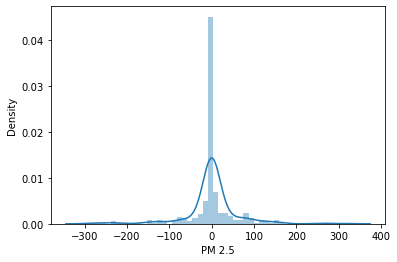

In [26]:
sns.distplot(y_test-prediction)

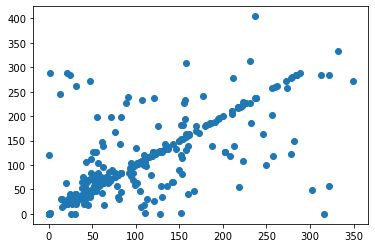

In [27]:
plt.scatter(y_test,prediction)

### Hyper Parameter Tuening

In [28]:
accuracy_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsRegressor(n_neighbors=i)
    score=cross_val_score(knn,X,y,cv=10,scoring="neg_mean_squared_error")
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'Accuracy Rate')

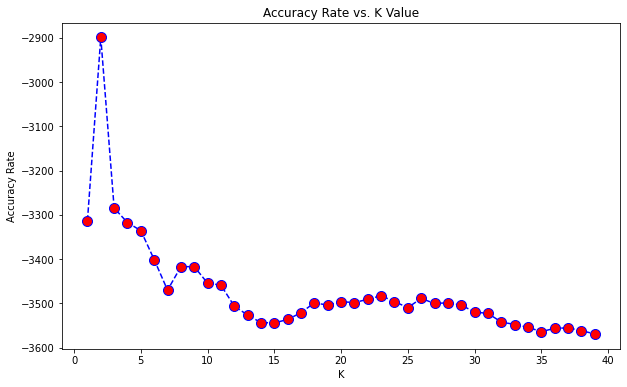

In [29]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
#plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
 #        markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [30]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsRegressor(n_neighbors=1)

knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

C:\Users\1mura\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

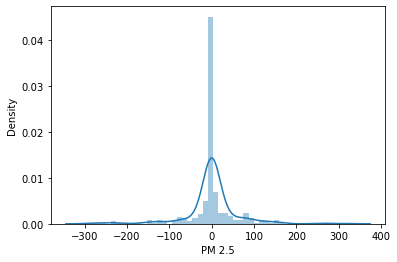

In [31]:
sns.distplot(y_test-predictions)

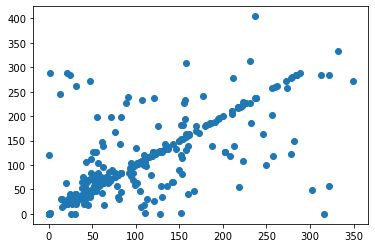

In [33]:
plt.scatter(y_test,predictions)

In [34]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 29.16859756097561
MSE: 3802.40060552168
RMSE: 61.66360843740561


In [35]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=3
knn = KNeighborsRegressor(n_neighbors=3)

knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

C:\Users\1mura\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

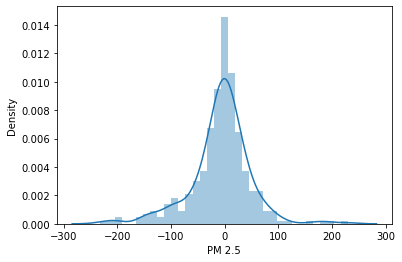

In [36]:
sns.distplot(y_test-predictions)

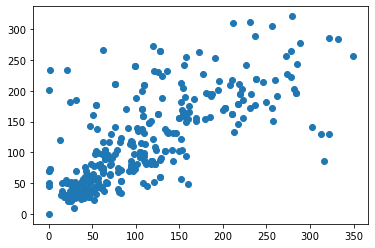

In [37]:
plt.scatter(y_test,predictions)

In [38]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 37.70438262195122
MSE: 3179.6796762729136
RMSE: 56.388648469997165


In [39]:
import pickle 

In [40]:
# open a file, where you ant to store the data
file = open('knn_model.pkl', 'wb')

# dump information to that file
pickle.dump(knn, file)